# Deriving the Coriolis frequency over the globe

The following example computes the Coriolis frequency and stores it in a cube with associated metadata. It then plots the Coriolis frequency on an orthographic
projection.

Start with arrays for latitudes and longitudes, with a given number of coordinates in the arrays.

In [3]:
import numpy as np

coordinate_points = 200
longitudes = np.linspace(-180.0, 180.0, coordinate_points)
latitudes = np.linspace(-90.0, 90.0, coordinate_points)
lon2d, lat2d = np.meshgrid(longitudes, latitudes)

Omega is the Earth's rotation rate, expressed in radians per second

In [2]:
omega = 7.29e-5

The data for our cube is the Coriolis frequency, `f = 2 * omega * sin(phi)`, which is computed for each grid point over the globe from the 2-dimensional latitude array.

In [2]:
data = 2. * omega * np.sin(np.deg2rad(lat2d))

We now need to define a coordinate system for the plot. Here we'll use GeogCS; 6371229 is the radius of the Earth in metres.

In [4]:
from iris.coord_systems import GeogCS

cs = GeogCS(6371229)

The Iris coords module turns the latitude list into a coordinate array. Coords then applies an appropriate standard name and unit to it.

In [2]:
import iris
lat_coord = iris.coords.DimCoord(latitudes,
                                 standard_name='latitude',
                                 units='degrees',
                                 coord_system=cs)
lon_coord = iris.coords.DimCoord(longitudes,
                                 standard_name='longitude',
                                 units='degrees',
                                 coord_system=cs)

Now we add bounds to our latitude and longitude coordinates. We want simple, contiguous bounds for our regularly-spaced coordinate points so we use the guess_bounds() method of the coordinate. For more complex coordinates, we could derive and set the bounds manually.

In [2]:
lat_coord.guess_bounds()
lon_coord.guess_bounds()

Put our data and coordinates into a cube

In [2]:
new_cube = iris.cube.Cube(data,
                          standard_name='coriolis_parameter',
                          units='s-1',
                          dim_coords_and_dims=[(lat_coord, 0),
                                               (lon_coord, 1)])

Let's plot our cube, along with coastlines, a title and an appropriately-labelled colour bar

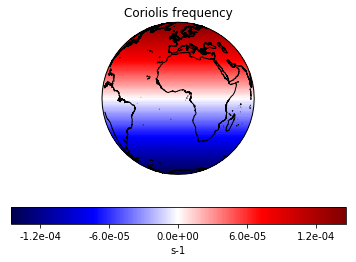

In [7]:
%matplotlib inline
import cartopy.crs as ccrs
import iris.plot as iplt
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines(resolution='10m')
mesh = iplt.pcolormesh(new_cube, cmap='seismic')
tick_levels = [-0.00012, -0.00006, 0.0, 0.00006, 0.00012]
plt.colorbar(mesh, orientation='horizontal', label='s-1',
             ticks=tick_levels, format='%.1e')
plt.title('Coriolis frequency');  # avoid return value from `plt.title` as output